<a href="https://colab.research.google.com/github/victorm0202/OP-2020-code/blob/master/1)_Taller_Keras_(keras_vs_TF2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras vs Tensorflow 2



*   Tensorflow 2 (`tf.keras`) vs Keras (`keras`)
*   Keras Modelo `tf.keras.Models.Sequence()`
*   Keras API





> TensorFlow 2.0 lanzado el 30 de Septiembre del 2019. Mucho de los códigos de TensorFLow 1.x  deberan migrar a Tensorflow 2. ¿Cuál es la diferencia entre installar `keras` y utilizar `tf.keras`?.

> Keras fue desarrollado por Francois Chillet, un desarrollador de Google AI. La primera versión lo lanzo con propositos personales en su repertorio Github en Marzo del 2015. Por su facílidad y popularidad el proyecto de Chollet fue escalado inclusive con la existencia de librerías como Torch, Theano, y Caffe. Las librerías mencionadas tenían el problema de ser tediosas , tardadas e ineficintes. En cambio, keras es facíl de utilizar para aquellas personas que no necesariamente son del área.



> Keras, necesita de un *backend* para poder correr y configurar arquitecturas del tipo redes neuronales. Pero, ¿Qué es un backend?, es un motor computacional, que en este caso construye el grafo de la red, ejecuta optimizadores y realiza el procesamiento en tiempo real. (eg. PHP language y que puede acceder a un DB, donde DB puede ser MySQL que funciona como el backend). Entonces, piensa en keras como una capa abstracta que se comunica con cierto framework o backend.

> Indented block



> Originalmente Keras utilizaba Theano como backend pero fue así hasta la versión v1.1.0. Tiempo despues, Google pueso a en la mesa TensorFLow, librería en la cual se puede hacer calculos simbolicos y utilizar para tareas de ML y DL.

> TernsorFLow comenzó a ser el backend de Keras, y en la actualidad se popularizo tanto que por default hablar de keras es hablar de TensorFLow. Practicamente, si tu instalas keras por default TensorFlow se instala en tu sistema.



> El submodulo conocido como `tf.keras` fue introducido en TensorFlow v1.10.0, siendo el primer paso para integrar Keras con TensorFLow de manera directa. EL paquete `tf.keras`  se encuentra totalmente separado del paquete `keras` paquete que puedes instalar y utilizar con `pip install keras`. Cabe mencionar que el paquete keras original no se incluyó en tensorflow para garantizar la compatibilidad y para que ambos pudieran desarrollarse orgánicamente.

> No obstante, con el anunción de Google en el 2019, keras se integra a TensorFLow como su API para facílitar el diseño de las redes. Con esto, No obstante, con el anuncio de Google y TensorFlow 2.0 (Junio 2019), declararon a keras como la API oficial de alto nivel para TensorFLow, para un facíl uso y entrenamiento.De esta manera, se logra la sincronización de  `keras` y `tf.keras`.

> Entonces para que esto, pues `keras` seguira areglando algunos bugs pero se pretende de que ya no sea así, entonces es recomendable que trabajen con `tf.keras`.



> Entonces se recoienda importar :

> `from tensorflow.keras import ...`

> Entre otra peculiaridad que veran después el uso de `Seesions` es sustituido por `GradientTape`, y en caso de tener código en TensorFLow v1, Google a lanzado un scipt llamado `tf_upgrade_v2`, el cual analiza tu código y te indica que lineas debe actualizar.

> Un poco a al parrafo anterior, en ocasiones uno requiere trabajar de forma dinámica sobre los grafos comutacionales que te genera TensorFLow, por lo regular uo puede no utilizar una capa de alto nivel de abstracción, como lo es keras, y computar por si mismo el dessarrollo de la red por medio de generar sesiones e inicializar el grafo.































In [ ]:
with tf.Session() as session:
	session.run(tf.global_variables_initializer())
	session.run(tf.tables_initializer())
	model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
		epochs=10, batch_size=64)

Ahora TensorFlow's eager execution, es un ambiente de programación que evalua operaciones de forma inmediatas, sin construir el grafo computacional. La operación te devuelve valores concretos en vez de construir el grafo y correr despues, esto es algo muy similar a como trabaja Pytorch.

Una referencia se encuentra aquí : https://www.tensorflow.org/guide/eager

In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
import os
import tensorflow as tf
tf.executing_eagerly()

True

Ya puedes correr TensorFLow de forma operativa y el resultado se ejecuta de forma inmediate


In [ ]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


Un objeto Session encapsula el entorno en el que se ejecutan los objetos Operation y se evalúan los objetos Tensor. Por ejemplo:


In [ ]:
tf.compat.v1.disable_eager_execution() # desconectar eager en  TF2.x
# Constuirmos el grafo
a = tf.constant(2.0)
c = a * a

# inicializamos el grafo
sess = tf.compat.v1.Session()

# evaluamos el tensor
print("hello, {}".format(sess.run(c)))

sess.close()

hello, 4.0


Más adelante, necesitaran el concepto de diferenciación automática que de forma general es una técnica de difereniación computacional que evaluan derivadas de cierta función por medio de un grafo computacional. Lo que tienen que saber aqui es que en TensorFLow 2, `tf.GradientTape` es el método encargado en entrenar o computar el gradiente de cierta función de manera dinámica (eger)
Sobre todo para entrenamientos más complejos en loop.


In [ ]:
import tensorflow as tf
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x
dy_dx = gg.gradient(y, x)     # Will compute to 6.0
d2y_dx2 = g.gradient(dy_dx, x)  # Will compute to 2.0

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x 
  dy_dx = gg.gradient(y, x)     # Will compute to 6.0
d2y_dx2 = g.gradient(dy_dx, x)

In [ ]:
print(d2y_dx2)

tf.Tensor(2.0, shape=(), dtype=float32)


## ¿Cómo declarar un Modelo ?

*  TensorFlow, Google Engineers opted for a static computational graph
* TF you define graph statically before a model can run, all communication with outer world is performed via tf.Session object and tf.Placeholder which are tensors that will be substituted by external data at runtime.

* “PyTorch”, developed and maintained by Facebook, uses a dynamic computational graph approach. In PyTorch things are way more imperative and dynamic: you can define, change and execute nodes as you go, no special session interfaces or placeholders

* Google realised this, and with v1.7 launched the feature of “Eager Execution” in TensorFlow.

What is Eager Execution?

Features of Eager Execution?
It is compatible with native Python debugging tools
Error logging is immediate
Native Python control flow i.e loops and recursions
Eager execution simplifies your code
Back propagation is built in to eager execution

“A NumPy-like library for numerical computation with support for GPU acceleration and automatic differentiation, and a flexible platform for machine learning research and experimentation.”

In [ ]:
# Importing stuff and enabling Eager Execution
import tensorflow as tf
tf.executing_eagerly()

True

* Superclass it allows you to call methods of the superclass in your subclass.

* The __call__() method of your layer will automatically run build the first time it is called. You now have a layer that's lazy and thus easier to use:

In [ ]:
# Definimos la clase modelo heredando las métodos de keras.Model
# Definimos la super clase para inicializar 
# All superclass, Linear Subclass
class Linear(tf.keras.Model): 
  def __init__(self):
    super(Linear, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')

  def call(self, inputs):
    return inputs * self.W + self.B

# More in : https://www.tensorflow.org/guide/keras/custom_layers_and_models    

In [ ]:
# A toy dataset of points around 3 * x + 2 + epsilon
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# The loss function to be optimized
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error)) # RMSE

#Here tf.GradientTape records all the operations in the forward pass to apply gradient later.
# tape.gradient function return the derivative of loss with respect to weight and bias. 
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

Next:

Create the model.
The Derivatives of a loss function with respect to model parameters.
A strategy for updating the variables based on the derivatives.

In [ ]:
model = Linear() # nstace the class
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 

print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
# Then passing this to optimizer.apply_gradients completes the process of applying gradient descent.
steps = 300
for i in range(steps):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
 

Initial loss: 66.612
Loss at step 000: 64.073
Loss at step 020: 29.674
Loss at step 040: 14.065
Loss at step 060: 6.970
Loss at step 080: 3.739
Loss at step 100: 2.265
Loss at step 120: 1.592
Loss at step 140: 1.284
Loss at step 160: 1.143
Loss at step 180: 1.078
Loss at step 200: 1.049
Loss at step 220: 1.035
Loss at step 240: 1.028
Loss at step 260: 1.026
Loss at step 280: 1.024


In [ ]:
print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

Final loss: 1.024


In [ ]:
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

W = 3.022151231765747, B = 2.063232660293579


In [ ]:
model.save_weights('weights')
status = model.load_weights('weights')

## Combine Keras and Eager train


In [ ]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [ ]:
# Build the model
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

In [ ]:
for images,labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.00343771 -0.01540999 -0.02027049 -0.05441063  0.02483962 -0.00510653
  -0.04519472 -0.01601397 -0.07347655  0.03244074]]


In [ ]:
# While keras models have a builtin training loop (using the fit method), sometimes you need more customization. Here's an example, of a training loop implemented with eager:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [ ]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    
    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(logits.shape, (32, 10))
    
    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [ ]:
def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('Epoch {} finished'.format(epoch))

In [ ]:
train(epochs = 3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

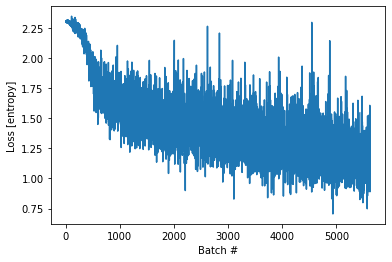

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [ ]:
# https://www.tensorflow.org/guide/eager

Referencia:

https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

https://towardsdatascience.com/simple-neural-network-model-using-tensorflow-eager-execution-997bbadef84a